# analysis

> Looking at outliers in terms of num_strokes, num_points.

In [ ]:
#| default_exp analysis

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import os

import numpy as np

from singeline_dataset.svg import *
from singeline_dataset.display import *
from singeline_dataset.transforms import *
from singeline_dataset.strokes import *
from singeline_dataset.dataset import *

In [ ]:
# np.savez('../outputs/subset.npz', full_dataset, encoding='latin1', allow_pickle=True)
# full_dataset = np.load(
#     "../datasets/v1-splice.npz", encoding="latin1", allow_pickle=True
# )["arr_0"]
# len(full_dataset)

1651

In [ ]:
full_dataset = np.load(
    "../datasets/v2-splice-eps05-j15-s40.npz", encoding="latin1", allow_pickle=True
)["arr_0"]
len(full_dataset)

1651

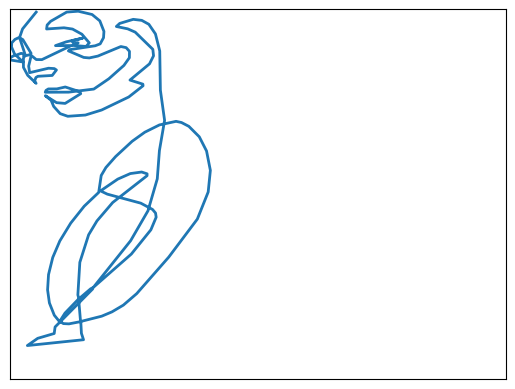

In [ ]:
plot_strokes(deltas_to_strokes(full_dataset[0]))

In [ ]:
summary = [
    {"idx": i, "num_points": len(deltas), "num_strokes": len(deltas_to_strokes(deltas))}
    for i, deltas in enumerate(full_dataset)
]

In [ ]:
by_num_strokes = sorted(summary, key=lambda k: k["num_strokes"], reverse=True)
by_num_strokes[:20]

[{'idx': 76, 'num_points': 219, 'num_strokes': 15},
 {'idx': 714, 'num_points': 194, 'num_strokes': 14},
 {'idx': 762, 'num_points': 578, 'num_strokes': 13},
 {'idx': 173, 'num_points': 634, 'num_strokes': 12},
 {'idx': 304, 'num_points': 613, 'num_strokes': 12},
 {'idx': 1408, 'num_points': 217, 'num_strokes': 12},
 {'idx': 484, 'num_points': 441, 'num_strokes': 11},
 {'idx': 698, 'num_points': 381, 'num_strokes': 11},
 {'idx': 746, 'num_points': 165, 'num_strokes': 11},
 {'idx': 52, 'num_points': 553, 'num_strokes': 10},
 {'idx': 67, 'num_points': 641, 'num_strokes': 10},
 {'idx': 985, 'num_points': 614, 'num_strokes': 10},
 {'idx': 34, 'num_points': 570, 'num_strokes': 9},
 {'idx': 277, 'num_points': 638, 'num_strokes': 9},
 {'idx': 290, 'num_points': 478, 'num_strokes': 9},
 {'idx': 614, 'num_points': 270, 'num_strokes': 9},
 {'idx': 981, 'num_points': 581, 'num_strokes': 9},
 {'idx': 990, 'num_points': 147, 'num_strokes': 9},
 {'idx': 1092, 'num_points': 427, 'num_strokes': 9},
 {

In [ ]:
import pandas as pd

df = pd.DataFrame(by_num_strokes)

In [ ]:
df.head()

,idx,num_points,num_strokes
0,76,219,15
1,714,194,14
2,762,578,13
3,173,634,12
4,304,613,12


<Axes: >

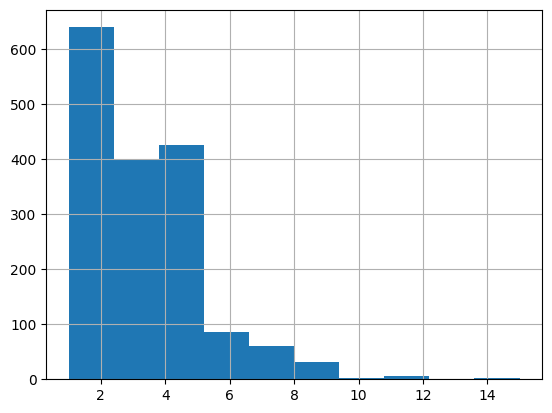

In [ ]:
df.num_strokes.hist()

In [ ]:
for i in range(10):
    print(i, len(df[df.num_strokes <= i]))

0 0
1 196
2 639
3 1037
4 1333
5 1462
6 1547
7 1607
8 1628
9 1639


## Chop Dataset into Train/Val

In [ ]:
d6 = df[df.num_strokes <= 6].sample(frac=1)
train_size = int(len(d6) * 0.8 / 100) * 100
val_size = len(d6) - train_size
print(train_size, val_size, len(d6))

d6_train = full_dataset[list(d6[:1200].idx)]
d6_val = full_dataset[list(d6[1200:].idx)]
print(len(d6_train), len(d6_val))

np.savez(
    "v2-splice-maxstrokes6.npz",
    train=d6_train,
    valid=d6_val,
    test=d6_val,
    encoding="latin1",
    allow_pickle=True,
)

1200 347 1547
1200 347


(1200, 347)

<Axes: >

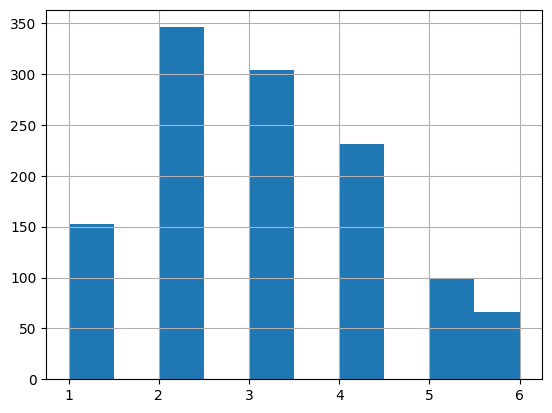

In [ ]:
d6_summary = [
    {"idx": i, "num_points": len(deltas), "num_strokes": len(deltas_to_strokes(deltas))}
    for i, deltas in enumerate(d6_train)
]
d6df = pd.DataFrame(d6_summary)
d6df.num_strokes.hist()

In [ ]:
d5 = df[df.num_strokes <= 5].sample(frac=1)
train_size = int(len(d5) * 0.8 / 100) * 100
val_size = len(d5) - train_size
print(train_size, val_size, len(d5))

d5_train = full_dataset[list(d5[:1200].idx)]
d5_val = full_dataset[list(d5[1200:].idx)]
print(len(d5_train), len(d5_val))

np.savez(
    "v2-splice-maxstrokes5.npz",
    train=d5_train,
    valid=d5_val,
    test=d5_val,
    encoding="latin1",
    allow_pickle=True,
)

1100 362 1462
1200 262


## Inspect edge cases

<Axes: >

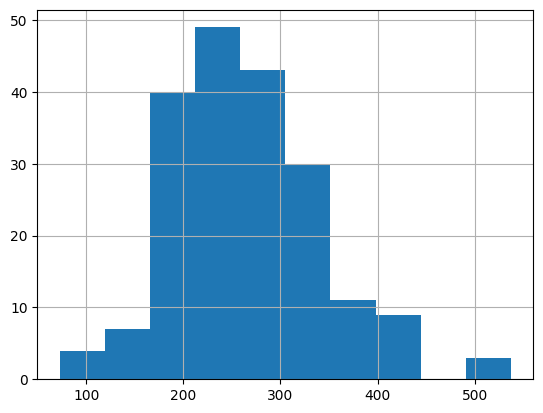

In [ ]:
df[df.num_strokes <= 2].num_points.hist()

In [ ]:
df[df.num_strokes <= 2].iloc[:5]

,idx,num_points,num_strokes
1455,0,177,2
1456,5,252,2
1457,12,236,2
1458,28,387,2
1459,35,303,2


In [ ]:
df[df.num_strokes <= 2].iloc[:5]

idx              0
num_points     177
num_strokes      2
Name: 1455, dtype: int64


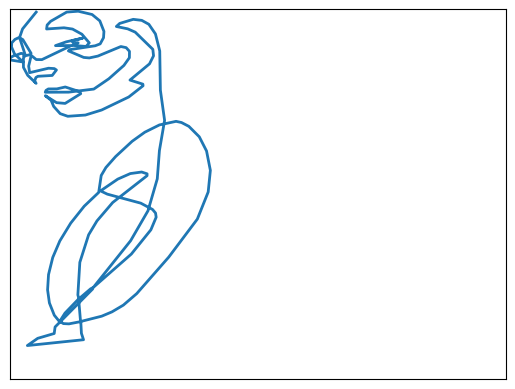

idx              5
num_points     252
num_strokes      2
Name: 1456, dtype: int64


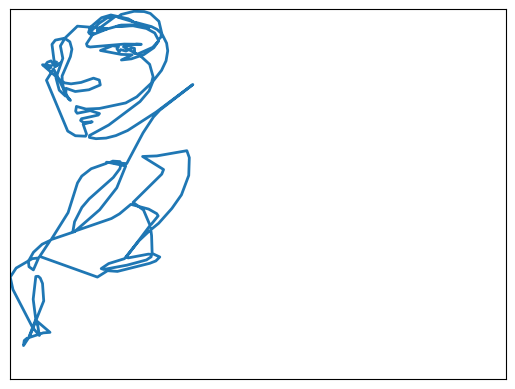

idx             12
num_points     236
num_strokes      2
Name: 1457, dtype: int64


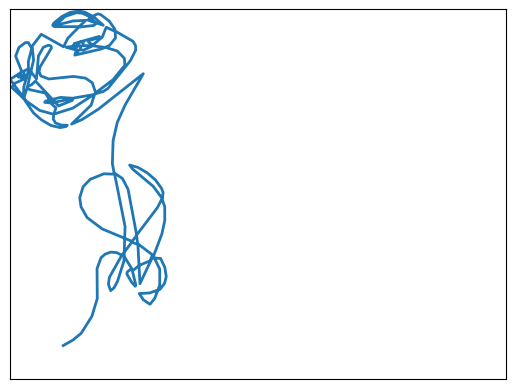

idx             28
num_points     387
num_strokes      2
Name: 1458, dtype: int64


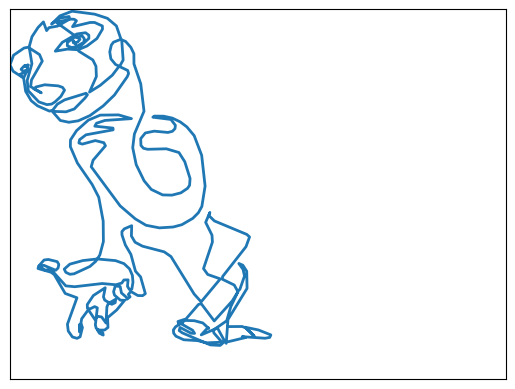

idx             35
num_points     303
num_strokes      2
Name: 1459, dtype: int64


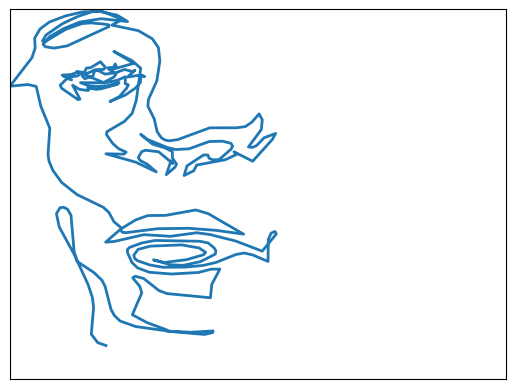

In [ ]:
for i in range(5):
    row = df[df.num_strokes <= 2].iloc[i]
    print(row)
    plot_strokes(deltas_to_strokes(full_dataset[row.idx]))

In [ ]:
tmp = full_dataset[row.idx]

In [ ]:
tmp

array([[ 4.25787166e+01,  2.00000000e+02,  0.00000000e+00],
       [-3.64354377e+00, -1.74309787e+00,  0.00000000e+00],
       [-2.87293145e+00, -5.04892546e+00,  0.00000000e+00],
       [ 1.01105720e+00, -1.59288114e+01,  0.00000000e+00],
       [-5.16932824e-01, -5.90633763e+00,  0.00000000e+00],
       [-1.88763866e+00, -7.77345543e+00,  0.00000000e+00],
       [-6.11747315e+00, -1.79352654e+01,  0.00000000e+00],
       [-6.70685241e+00, -1.65759720e+01,  0.00000000e+00],
       [-1.23769748e+00, -7.91229018e+00,  0.00000000e+00],
       [ 1.52684303e+00, -3.55413149e+00,  0.00000000e+00],
       [ 1.67438265e+00, -2.90197657e-01,  0.00000000e+00],
       [ 1.71900315e+00,  1.18167725e+00,  0.00000000e+00],
       [ 1.53392577e+00,  3.62204793e+00,  0.00000000e+00],
       [ 1.39850731e+00,  2.18686229e+01,  0.00000000e+00],
       [ 1.38272001e+00,  5.78846627e+00,  0.00000000e+00],
       [ 7.35344180e+00,  6.51254869e+00,  0.00000000e+00],
       [ 3.64917305e+00,  4.73393376e+00

In [ ]:
tmp1 = deltas_to_strokes(tmp)

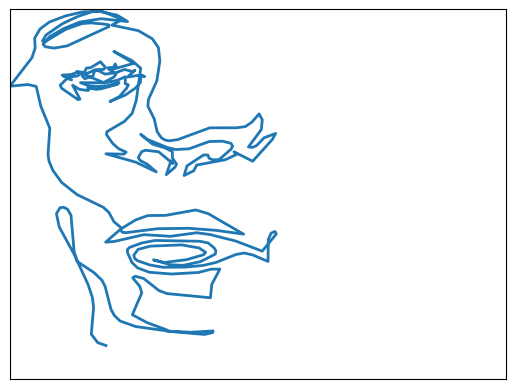

In [ ]:
plot_strokes(tmp1)

In [ ]:
tmp1 = [s for s in deltas_to_strokes(tmp) if len(s) > 0]

strokes_to_deltas(rdp_strokes(tmp1, epsilon=1.1)).shape

(194, 3)

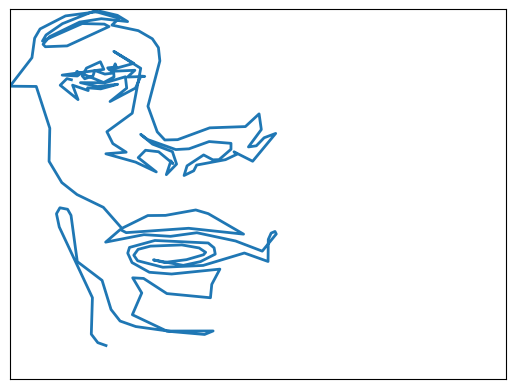

In [ ]:
plot_strokes(rdp_strokes(tmp1, epsilon=1.1))

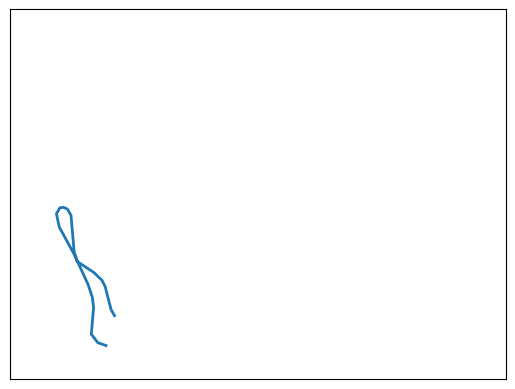

In [ ]:
import numpy as np

max_seq_len = 20
overflow = len(tmp) - max_seq_len
rand_offset = int(np.random.rand() * overflow)
overflow, rand_offset
rand_offset = 0
plot_strokes(deltas_to_strokes(tmp[rand_offset : rand_offset + max_seq_len]))

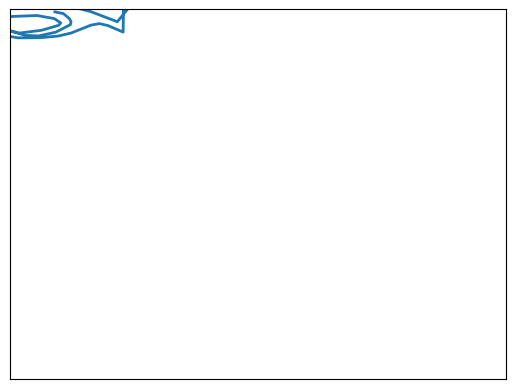

In [ ]:
plot

<Axes: >

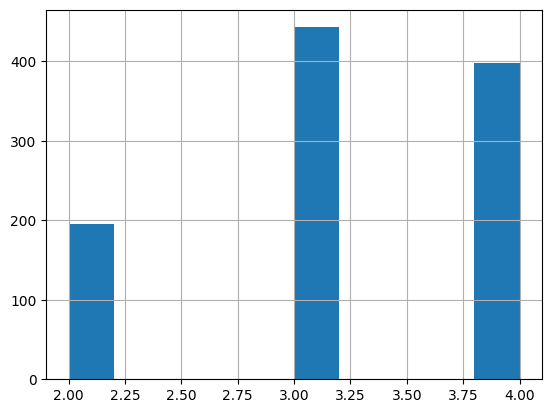

In [ ]:
df[df.num_strokes < 5].sample(frac=1).num_strokes.hist()

In [ ]:
len(df[df.num_strokes == 6])

129

idx             30
num_points     295
num_strokes      6
Name: 189, dtype: int64


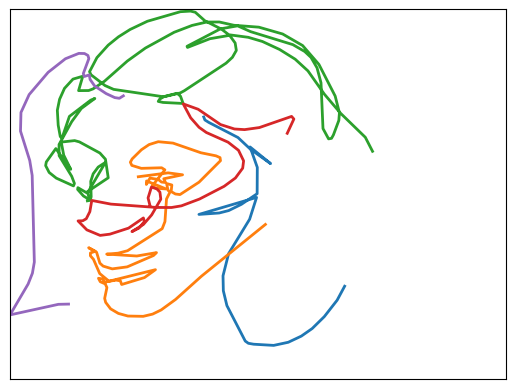

idx            115
num_points     372
num_strokes      6
Name: 190, dtype: int64


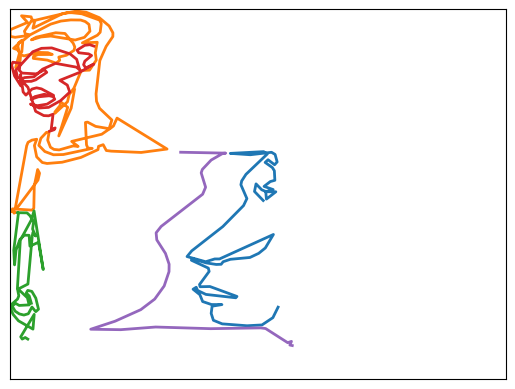

idx            123
num_points     173
num_strokes      6
Name: 191, dtype: int64


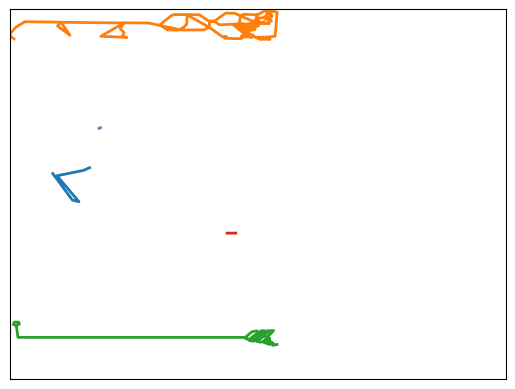

idx            134
num_points     391
num_strokes      6
Name: 192, dtype: int64


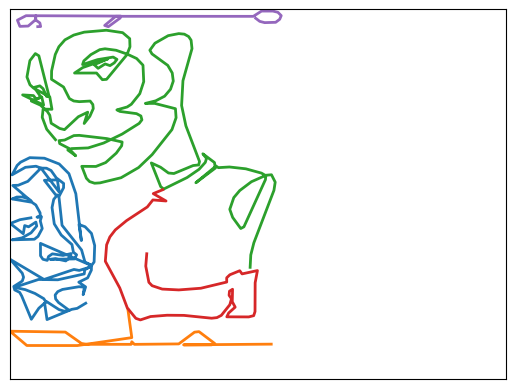

idx            137
num_points     163
num_strokes      6
Name: 193, dtype: int64


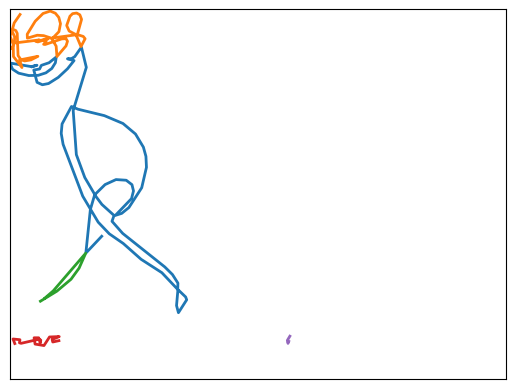

In [ ]:
for i in range(5):
    row = df[df.num_strokes == 6].iloc[i]
    print(row)
    plot_strokes(deltas_to_strokes(full_dataset[row.idx]))

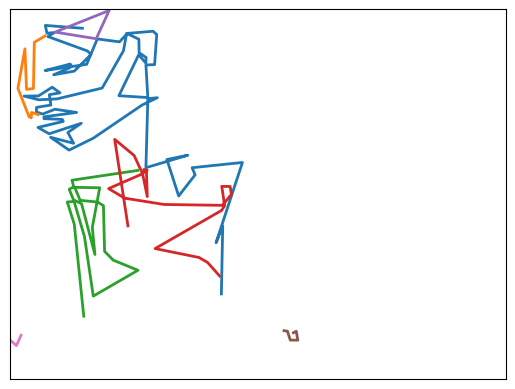

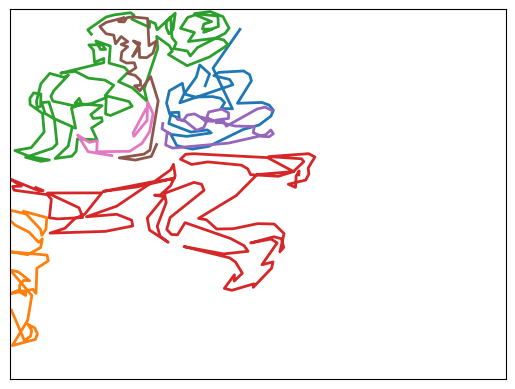

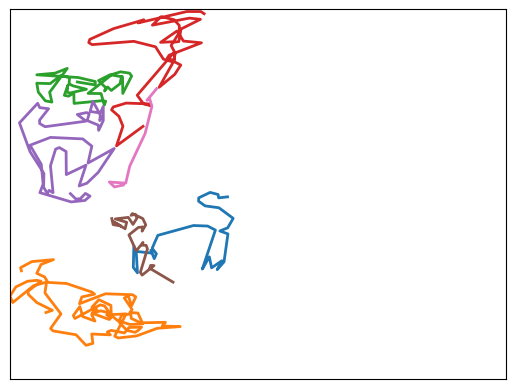

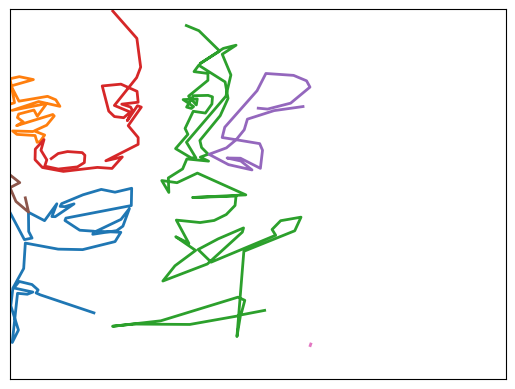

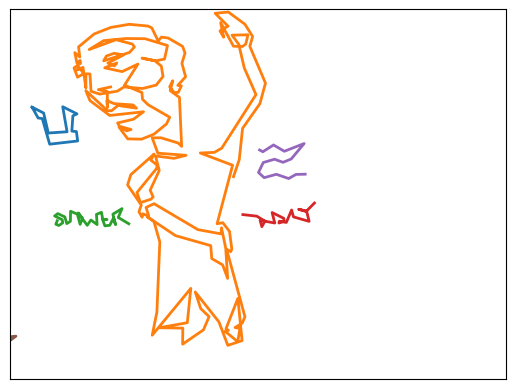

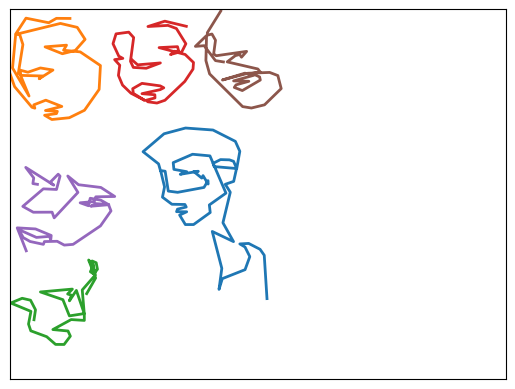

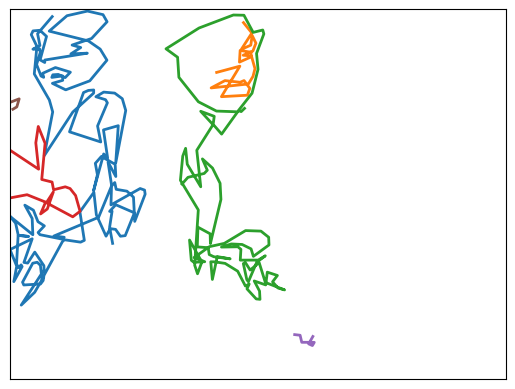

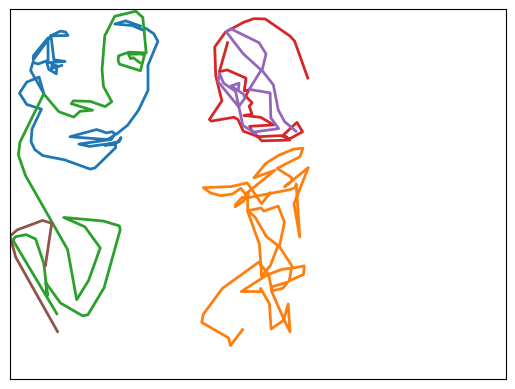

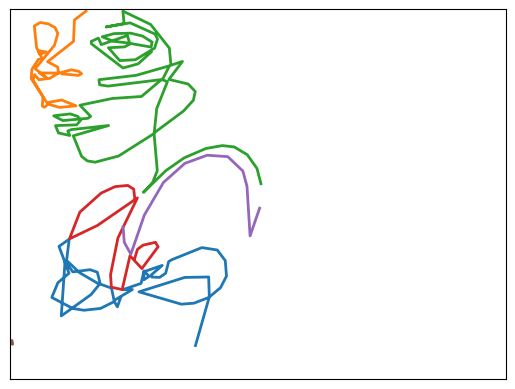

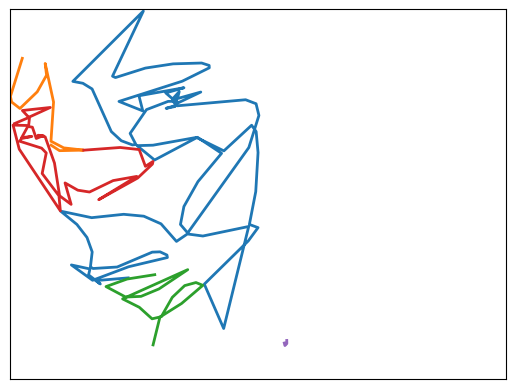

In [ ]:
for entry in by_num_strokes[10:20]:
    idx, num_points, num_strokes = entry
    plot_strokes(deltas_to_strokes(full_dataset[idx]))

## Find shortest strokes

In [ ]:
len(df[df.num_strokes == 4])

310

In [ ]:
# for idx in range(len(df[df.num_strokes <= 4])):
#     print(idx)

## Visualizing (up to N=4 strokes)

In [ ]:
imgs_01 = sorted(enumerate_files("../outputs_segmented/png/01/"))
abs_01 = [os.path.join("../outputs_segmented/png/01", f) for f in imgs_01]
imgs_02 = sorted(enumerate_files("../outputs_segmented/png/02/"))
abs_02 = [os.path.join("../outputs_segmented/png/02", f) for f in imgs_02]
imgs_03 = sorted(enumerate_files("../outputs_segmented/png/03/"))
abs_03 = [os.path.join("../outputs_segmented/png/03", f) for f in imgs_03]
imgs_04 = sorted(enumerate_files("../outputs_segmented/png/04/"))
abs_04 = [os.path.join("../outputs_segmented/png/04", f) for f in imgs_04]

In [ ]:
abs_01[:20]

['../outputs_segmented/png/01/0003.0_strokes.png',
 '../outputs_segmented/png/01/0003.1_joined.png',
 '../outputs_segmented/png/01/0003.2_spliced.png',
 '../outputs_segmented/png/01/0003.3_deltas.png',
 '../outputs_segmented/png/01/0006.0_strokes.png',
 '../outputs_segmented/png/01/0006.1_joined.png',
 '../outputs_segmented/png/01/0006.2_spliced.png',
 '../outputs_segmented/png/01/0006.3_deltas.png',
 '../outputs_segmented/png/01/0008.0_strokes.png',
 '../outputs_segmented/png/01/0008.1_joined.png',
 '../outputs_segmented/png/01/0008.2_spliced.png',
 '../outputs_segmented/png/01/0008.3_deltas.png',
 '../outputs_segmented/png/01/0023.0_strokes.png',
 '../outputs_segmented/png/01/0023.1_joined.png',
 '../outputs_segmented/png/01/0023.2_spliced.png',
 '../outputs_segmented/png/01/0023.3_deltas.png',
 '../outputs_segmented/png/01/0027.0_strokes.png',
 '../outputs_segmented/png/01/0027.1_joined.png',
 '../outputs_segmented/png/01/0027.2_spliced.png',
 '../outputs_segmented/png/01/0027.3_del

In [ ]:
from moviepy.editor import *

all_fnames = abs_01 + abs_02 + abs_03 + abs_04

new_clip = ImageSequenceClip(all_fnames, fps=20)
new_clip.write_videofile("new_file_fps20.mp4")

Moviepy - Building video new_file_fps20.mp4.
Moviepy - Writing video new_file_fps20.mp4



Moviepy - Done !
Moviepy - video ready new_file_fps20.mp4


In [ ]:
new_clip = ImageSequenceClip(all_fnames, fps=24)
new_clip.write_videofile("new_file_fps24.mp4")

Moviepy - Building video new_file_fps24.mp4.
Moviepy - Writing video new_file_fps24.mp4



Moviepy - Done !
Moviepy - video ready new_file_fps24.mp4


In [ ]:
#| hide
import nbdev

nbdev.nbdev_export()